In [1]:
from citipy import citipy
from random import random
import numpy as np
from random import uniform
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
import time
import requests as req

In [2]:
list1 = np.random.uniform(-80,80, size = 1200)
list2 = np.random.uniform(-180,180, size = 1200)
list1_df = pd.DataFrame({"Lat": list1, "Lng": list2})
list1_df.head()
list1_df.count()

Lat    1200
Lng    1200
dtype: int64

In [3]:
list1_df["City"] = ""
list1_df["Country"] = ""

# Use citipy to find the nearest city to given random coords and write into the DF
for index, row in list1_df.iterrows():
    city = citipy.nearest_city(row["Lat"], row["Lng"])
    list1_df.set_value(index, "City", city.city_name)
    list1_df.set_value(index, "Country", city.country_code)

# Remove duplicate cities
list1_df = list1_df.drop_duplicates(["City"], keep='first')
list1_df.head()

,Lat,Lng,City,Country
0,3.155820,-12.931031,monrovia,lr
1,54.821781,121.202196,amazar,ru
2,-50.151464,125.745289,esperance,au
3,-43.156015,-86.781602,castro,cl
4,24.812125,-53.591220,codrington,ag


In [4]:
akey = "34ae2627193903bb86906bf116b20b46"
url = "http://api.openweathermap.org/data/2.5/weather?q="

list1_df["Max Temp"] = ""
list1_df["Hum"] = ""
list1_df["Cloud"] = ""
list1_df["Wind"] = ""

SleepCounter = 0
PullCounter = 0
BatchCounter = 1

# Loop through the APIs to construct new columns in df
for index, row in list1_df.iterrows():
    try:
        query = url + row["City"].replace(" ","+") + "," + row["Country"] + "&appid=" + akey + "&units=imperial"
        #get = req.get(query)
        result = req.get(query).json()
        #print(result)
        list1_df.set_value(index, "Max Temp", result["main"]["temp_max"])
        list1_df.set_value(index, "Hum", result["main"]["humidity"])
        list1_df.set_value(index, "Cloud", result["clouds"]["all"])
        list1_df.set_value(index, "Wind", result["wind"]["speed"])
    except:
        list1_df.set_value(index, "Max Temp", "FAIL")
    
        PullCounter += 1
    
        SleepCounter += 1
    
    # If loop to ensure not overloading the weather API
    if SleepCounter == 40:
        print("~~~ Break Time ~~~")
        time.sleep(10)
        print("")
        SleepCounter = 0
        BatchCounter += 1       
    
    
    # Printing API link
    print("Processing Record " + str(PullCounter) + " of Set " + str(BatchCounter) +" | " + row["City"])
    print(query)

Processing Record 0 of Set 1 | monrovia
http://api.openweathermap.org/data/2.5/weather?q=monrovia,lr&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 0 of Set 1 | amazar
http://api.openweathermap.org/data/2.5/weather?q=amazar,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 0 of Set 1 | esperance
http://api.openweathermap.org/data/2.5/weather?q=esperance,au&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 0 of Set 1 | castro
http://api.openweathermap.org/data/2.5/weather?q=castro,cl&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 1 of Set 1 | codrington
http://api.openweathermap.org/data/2.5/weather?q=codrington,ag&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 1 of Set 1 | price
http://api.openweathermap.org/data/2.5/weather?q=price,us&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 2 of Set 1 | bargal
http://api.openweathermap.org/data/2.5/w

Processing Record 7 of Set 1 | east london
http://api.openweathermap.org/data/2.5/weather?q=east+london,za&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 7 of Set 1 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?q=sao+joao+da+barra,br&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 7 of Set 1 | kerch
http://api.openweathermap.org/data/2.5/weather?q=kerch,ua&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 7 of Set 1 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?q=cabo+san+lucas,mx&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 7 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?q=port+alfred,za&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 8 of Set 1 | makung
http://api.openweathermap.org/data/2.5/weather?q=makung,tw&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 8 of Set 1 | jizan
h

Processing Record 12 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?q=kapaa,us&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 13 of Set 1 | khani
http://api.openweathermap.org/data/2.5/weather?q=khani,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 13 of Set 1 | coos bay
http://api.openweathermap.org/data/2.5/weather?q=coos+bay,us&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 13 of Set 1 | kaohsiung
http://api.openweathermap.org/data/2.5/weather?q=kaohsiung,tw&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 14 of Set 1 | malwan
http://api.openweathermap.org/data/2.5/weather?q=malwan,in&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 14 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?q=albany,au&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 14 of Set 1 | kirksville
http://api.openweathermap.org/data/2.5/

Processing Record 19 of Set 1 | chara
http://api.openweathermap.org/data/2.5/weather?q=chara,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 19 of Set 1 | upernavik
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 20 of Set 1 | cookshire
http://api.openweathermap.org/data/2.5/weather?q=cookshire,ca&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 21 of Set 1 | nguiu
http://api.openweathermap.org/data/2.5/weather?q=nguiu,au&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 21 of Set 1 | victor harbor
http://api.openweathermap.org/data/2.5/weather?q=victor+harbor,au&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 21 of Set 1 | rundu
http://api.openweathermap.org/data/2.5/weather?q=rundu,na&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 21 of Set 1 | buraydah
http://api.openweathermap.o

Processing Record 30 of Set 1 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 30 of Set 1 | forbes
http://api.openweathermap.org/data/2.5/weather?q=forbes,au&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 30 of Set 1 | andros town
http://api.openweathermap.org/data/2.5/weather?q=andros+town,bs&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 31 of Set 1 | yaan
http://api.openweathermap.org/data/2.5/weather?q=yaan,cn&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 31 of Set 1 | caborca
http://api.openweathermap.org/data/2.5/weather?q=caborca,mx&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 32 of Set 1 | vaitupu
http://api.openweathermap.org/data/2.5/weather?q=vaitupu,wf&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 32 of Set 1 | marrakesh
http://api.openweathermap.or

Processing Record 36 of Set 1 | ambilobe
http://api.openweathermap.org/data/2.5/weather?q=ambilobe,mg&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 36 of Set 1 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?q=nouadhibou,mr&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 36 of Set 1 | corinto
http://api.openweathermap.org/data/2.5/weather?q=corinto,ni&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 36 of Set 1 | farakka
http://api.openweathermap.org/data/2.5/weather?q=farakka,in&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 37 of Set 1 | asau
http://api.openweathermap.org/data/2.5/weather?q=asau,tv&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 37 of Set 1 | puerto colombia
http://api.openweathermap.org/data/2.5/weather?q=puerto+colombia,co&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 37 of Set 1 | bambous virieux
http://api

Processing Record 48 of Set 2 | saldanha
http://api.openweathermap.org/data/2.5/weather?q=saldanha,za&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 48 of Set 2 | presidencia roque saenz pena
http://api.openweathermap.org/data/2.5/weather?q=presidencia+roque+saenz+pena,ar&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 48 of Set 2 | jinchang
http://api.openweathermap.org/data/2.5/weather?q=jinchang,cn&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 48 of Set 2 | mao
http://api.openweathermap.org/data/2.5/weather?q=mao,td&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 48 of Set 2 | te anau
http://api.openweathermap.org/data/2.5/weather?q=te+anau,nz&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 48 of Set 2 | cukai
http://api.openweathermap.org/data/2.5/weather?q=cukai,my&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 48 of Set 2 | forio
http

Processing Record 53 of Set 2 | sorland
http://api.openweathermap.org/data/2.5/weather?q=sorland,no&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 53 of Set 2 | suicheng
http://api.openweathermap.org/data/2.5/weather?q=suicheng,cn&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 53 of Set 2 | muriwai beach
http://api.openweathermap.org/data/2.5/weather?q=muriwai+beach,nz&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 53 of Set 2 | horta
http://api.openweathermap.org/data/2.5/weather?q=horta,pt&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 53 of Set 2 | vilyuysk
http://api.openweathermap.org/data/2.5/weather?q=vilyuysk,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 53 of Set 2 | yerbogachen
http://api.openweathermap.org/data/2.5/weather?q=yerbogachen,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 53 of Set 2 | kalaleh
http://api.openw

Processing Record 59 of Set 2 | broken hill
http://api.openweathermap.org/data/2.5/weather?q=broken+hill,au&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 59 of Set 2 | khonsa
http://api.openweathermap.org/data/2.5/weather?q=khonsa,in&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 59 of Set 2 | itoman
http://api.openweathermap.org/data/2.5/weather?q=itoman,jp&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 59 of Set 2 | bell ville
http://api.openweathermap.org/data/2.5/weather?q=bell+ville,ar&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 60 of Set 2 | milkovo
http://api.openweathermap.org/data/2.5/weather?q=milkovo,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 60 of Set 2 | morgantown
http://api.openweathermap.org/data/2.5/weather?q=morgantown,us&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 60 of Set 2 | guarapari
http://api.openwea

Processing Record 67 of Set 2 | el badari
http://api.openweathermap.org/data/2.5/weather?q=el+badari,eg&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 67 of Set 2 | mocuba
http://api.openweathermap.org/data/2.5/weather?q=mocuba,mz&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 67 of Set 2 | issoudun
http://api.openweathermap.org/data/2.5/weather?q=issoudun,fr&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 67 of Set 2 | jurado
http://api.openweathermap.org/data/2.5/weather?q=jurado,co&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 67 of Set 2 | teguldet
http://api.openweathermap.org/data/2.5/weather?q=teguldet,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 67 of Set 2 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?q=komsomolskiy,ru&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 67 of Set 2 | placerville
http://api.openwea

Processing Record 71 of Set 2 | hanyang
http://api.openweathermap.org/data/2.5/weather?q=hanyang,cn&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 71 of Set 2 | girona
http://api.openweathermap.org/data/2.5/weather?q=girona,es&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 71 of Set 2 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 71 of Set 2 | syedove
http://api.openweathermap.org/data/2.5/weather?q=syedove,ua&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 71 of Set 2 | shaoguan
http://api.openweathermap.org/data/2.5/weather?q=shaoguan,cn&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 71 of Set 2 | hearst
http://api.openweathermap.org/data/2.5/weather?q=hearst,ca&appid=34ae2627193903bb86906bf116b20b46&units=imperial
Processing Record 71 of Set 2 | luanda
http://api.openweathermap.org/data/2.5/

In [5]:
# Remove any rows that did not have data and run a final count to ensure a large enough data table
final_df = list1_df.loc[list1_df["Max Temp"] != "FAIL"]
final_df.head()


,Lat,Lng,City,Country,Max Temp,Hum,Cloud,Wind
0,3.155820,-12.931031,monrovia,lr,89.6,66,40,13.87
1,54.821781,121.202196,amazar,ru,33.52,65,8,2.37
2,-50.151464,125.745289,esperance,au,51.52,83,0,5.73
3,-43.156015,-86.781602,castro,cl,50.53,100,88,3.27
5,38.315204,-111.477799,price,us,46.4,42,20,5.82


In [31]:
# Make new df's to plot
temp_df = final_df[["Lat","Max Temp"]]
hum_df = final_df[["Lat", "Hum"]]
cloud_df = final_df[["Lat", "Cloud"]]
wind_df = final_df[["Lat", "Wind"]]


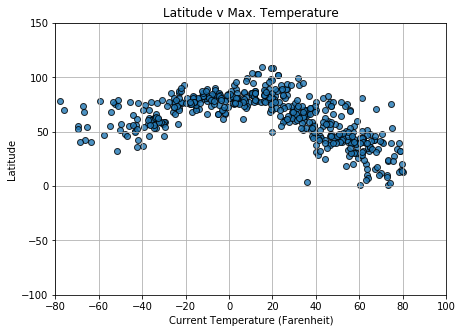

In [32]:
# Lat v Temp scatter plot
plt.figure(figsize=(7,5))
plt.scatter(temp_df["Lat"],temp_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude v Max. Temperature")
plt.xlabel("Current Temperature (Farenheit)")
plt.ylabel("Latitude")
plt.ylim(-100, 150)
plt.xlim(-80,100)
plt.grid(True)
plt.savefig("Resources/LatVsTemp.png")
plt.show()

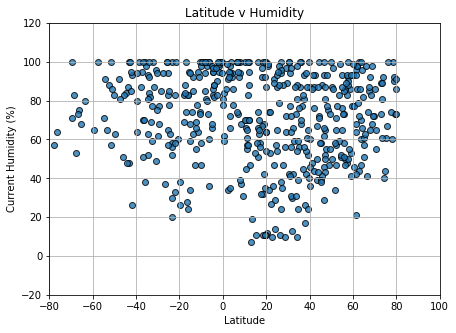

In [33]:
# Lat v Hum scatter plot
plt.figure(figsize=(7,5))
plt.scatter(hum_df["Lat"],hum_df["Hum"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude v Humidity")
plt.ylabel("Current Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(-20, 120)
plt.xlim(-80,100)
plt.grid(True)
plt.savefig("Resources/LatVsHumidity.png")
plt.show()

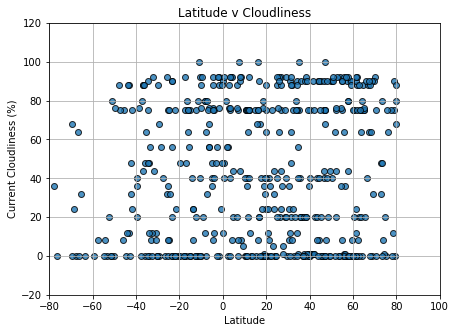

In [34]:
# Lat v cloudliness scatter plot
plt.figure(figsize=(7,5))
plt.scatter(cloud_df["Lat"],cloud_df["Cloud"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude v Cloudliness")
plt.ylabel("Current Cloudliness (%)")
plt.xlabel("Latitude")
plt.ylim(-20, 120)
plt.xlim(-80,100)
plt.grid(True)
plt.savefig("Resources/LatVsCloudiness.png")
plt.show()

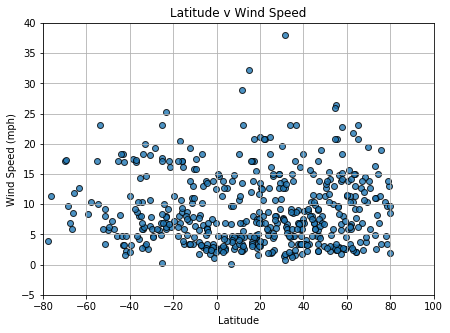

In [35]:
# Lat v Wind Speed scatter plot
plt.figure(figsize=(7,5))
plt.scatter(wind_df["Lat"],wind_df["Wind"],edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude v Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylim(-5, 40)
plt.xlim(-80,100)
plt.grid(True)
plt.savefig("Resources/LatVsWind.png")
plt.show()

In [30]:
final_df.to_csv("Cities.csv")